In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('video_games_sales.csv')

In [123]:
df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


rank - ранг

name - название

platform - платформа

year - год издательства

genre - жанр

publisher - издатель

na_sales - продыжи в Северной Америке

eu_sales - продажы в Европе

jp_sales - продажи в Японии

ohter_sales - продажи в других регионах

global_sales - продажи(суммарное по всем)

продажи измерялись в млн долларах

In [ ]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [124]:
df_modified = df.copy()

In [125]:
df_modified = df_modified.dropna(subset=['year', 'publisher'])

In [ ]:
df_modified.isnull().sum()

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

In [ ]:
df_modified['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
df_modified['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
df_modified['publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [126]:
np.sort(df_modified['year'].unique())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.])

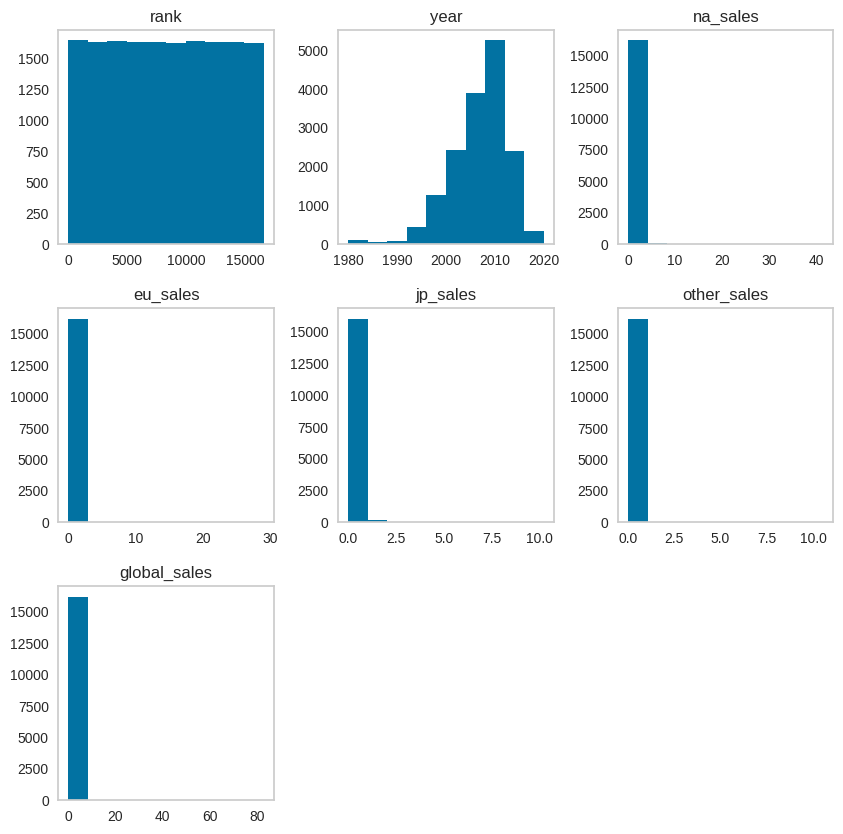

In [127]:
df_modified.hist(figsize=(10, 10), grid=False)
plt.show()

<ipython-input-101-61763f83914d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_modified, x = 'platform', palette='viridis', order = class_order)


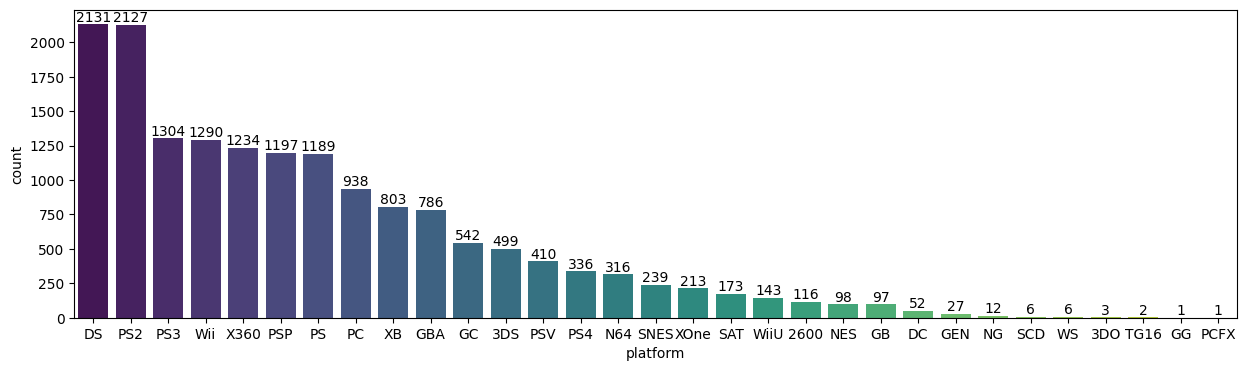

In [ ]:
class_order = df_modified['platform'].value_counts().index
fig, ax = plt.subplots(figsize = (15,4))
sns.countplot(data = df_modified, x = 'platform', palette='viridis', order = class_order)
cnt = df_modified.platform.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])

plt.show()

Больше всего было выпущено игр на PS2 и DS(нинтендо)

<ipython-input-79-619b84e0ad37>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_modified, x = 'genre', palette='viridis', order = class_order)


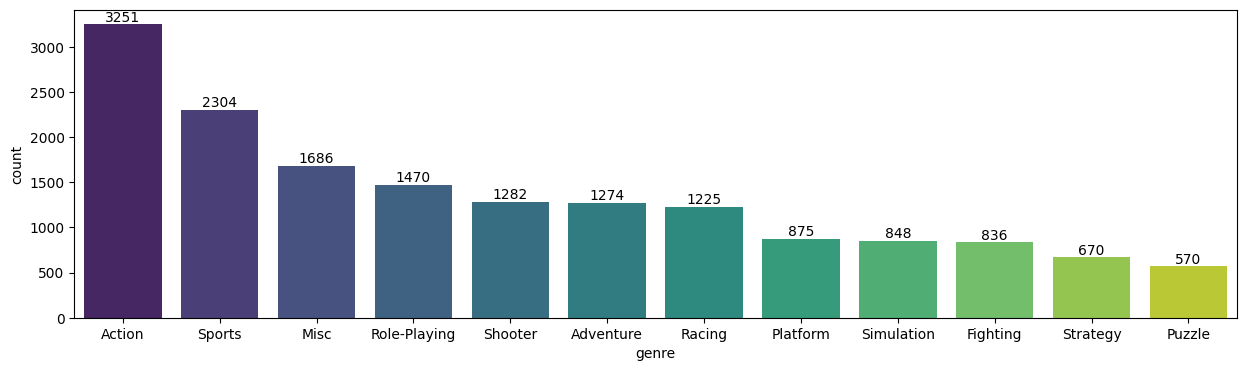

In [ ]:
class_order = df_modified['genre'].value_counts().index
fig, ax = plt.subplots(figsize = (15,4))
sns.countplot(data = df_modified, x = 'genre', palette='viridis', order = class_order)
cnt = df_modified.genre.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])


Исходя из графика следет, что больше всего игры жанра экшен было выпущено

<ipython-input-80-b8ce44930c21>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_modified, x = 'year', palette='viridis', order = class_order)


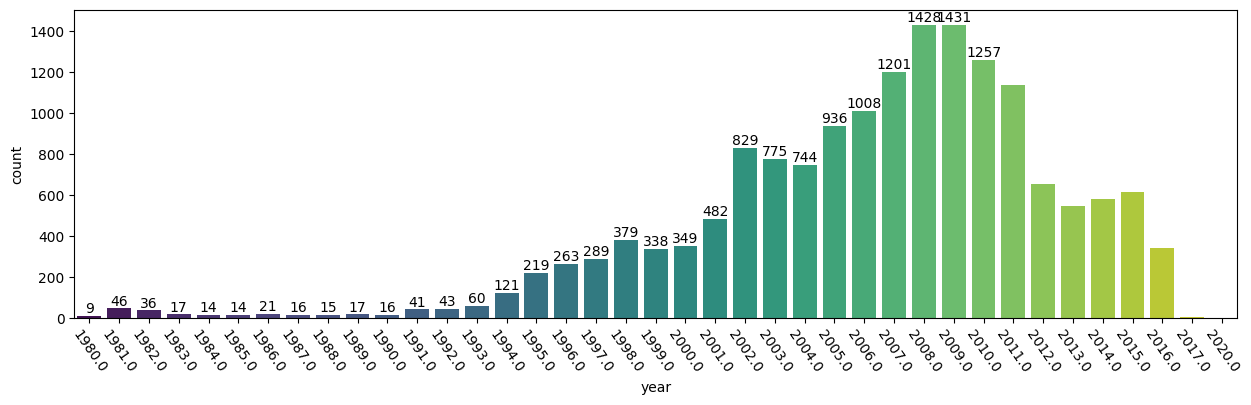

In [ ]:
class_order = np.sort(df_modified['year'].unique())
fig, ax = plt.subplots(figsize = (15,4))
sns.countplot(data = df_modified, x = 'year', palette='viridis', order = class_order)
cnt = df_modified.platform.nunique()
for i in range(cnt):
  ax.bar_label(ax.containers[i])

plt.xticks(rotation = -55)
plt.show()

В 2008 и 2009 годах наблюдался пик выпуска игр, после чего из графтка видно, что начался кризис

<ipython-input-81-e67f5ed5527f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_modified['platform'], y = df_modified['global_sales'],palette = 'rocket')
<ipython-input-81-e67f5ed5527f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_modified['platform'], y = df_modified['na_sales'],palette = 'rocket')
<ipython-input-81-e67f5ed5527f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_modified['platform'], y = df_modified['eu_sales'],palette = 'rocket')
<ipython-input-81-e67f5ed5527f>:21: FutureWarning: 

Passing `palett

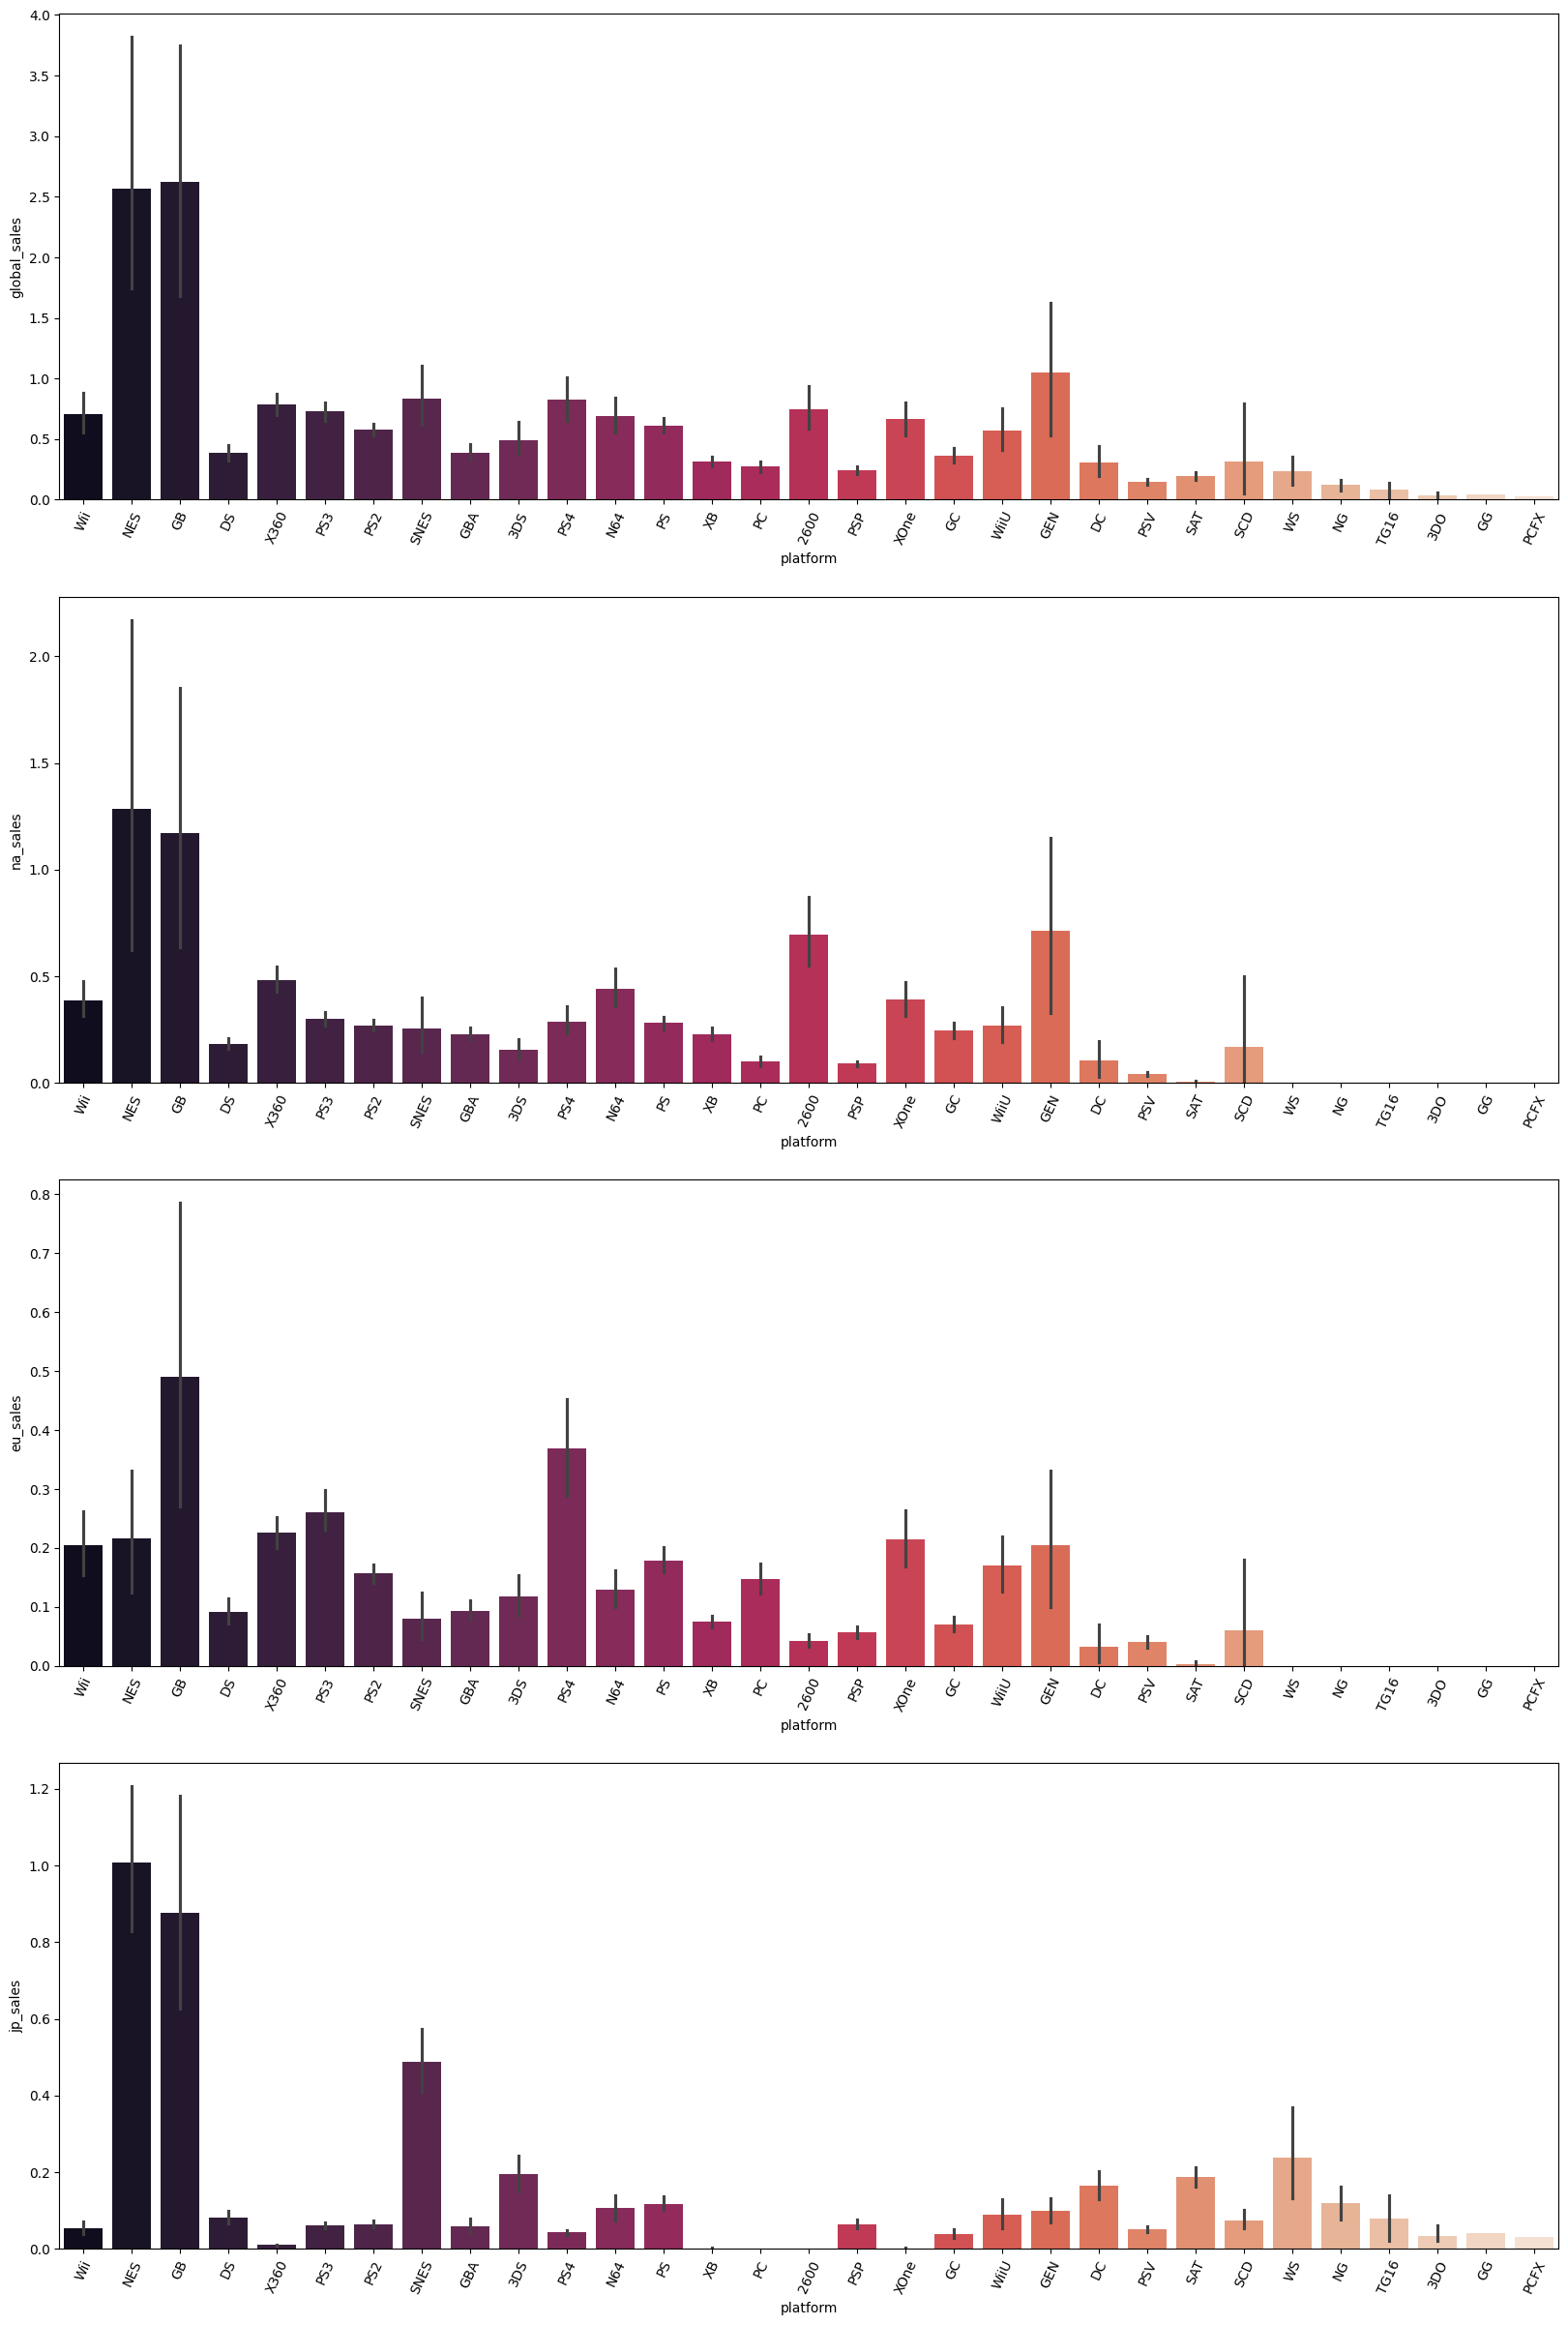

In [ ]:
plt.figure(figsize=(20,30))
plt.subplot(4,1,1)
sns.barplot(x = df_modified['platform'], y = df_modified['global_sales'],palette = 'rocket')
plt.xlabel('platform')
plt.ylabel('global_sales')
plt.xticks(rotation = 65)

plt.subplot(4,1,2)
sns.barplot(x = df_modified['platform'], y = df_modified['na_sales'],palette = 'rocket')
plt.xlabel('platform')
plt.ylabel('na_sales')
plt.xticks(rotation = 65)

plt.subplot(4,1,3)
sns.barplot(x = df_modified['platform'], y = df_modified['eu_sales'],palette = 'rocket')
plt.xlabel('platform')
plt.ylabel('eu_sales')
plt.xticks(rotation = 65)

plt.subplot(4,1,4)
sns.barplot(x = df_modified['platform'], y = df_modified['jp_sales'],palette = 'rocket')
plt.xlabel('platform')
plt.ylabel('jp_sales')
plt.xticks(rotation = 65)
plt.show()

Исходя из графиков следует, что в регионах наблюдалось схожяа продажа игр на одни и теже платформы(NES и GB), только в Европе отличие со всеми(наблюдался тренд на PS4 и GB)

<ipython-input-82-5d949d20606a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_modified['genre'], y = df_modified['global_sales'],palette = 'viridis')
<ipython-input-82-5d949d20606a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_modified['genre'], y = df_modified['na_sales'],palette = 'viridis')
<ipython-input-82-5d949d20606a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_modified['genre'], y = df_modified['eu_sales'],palette = 'viridis')
<ipython-input-82-5d949d20606a>:21: FutureWarning: 

Passing `palette` wit

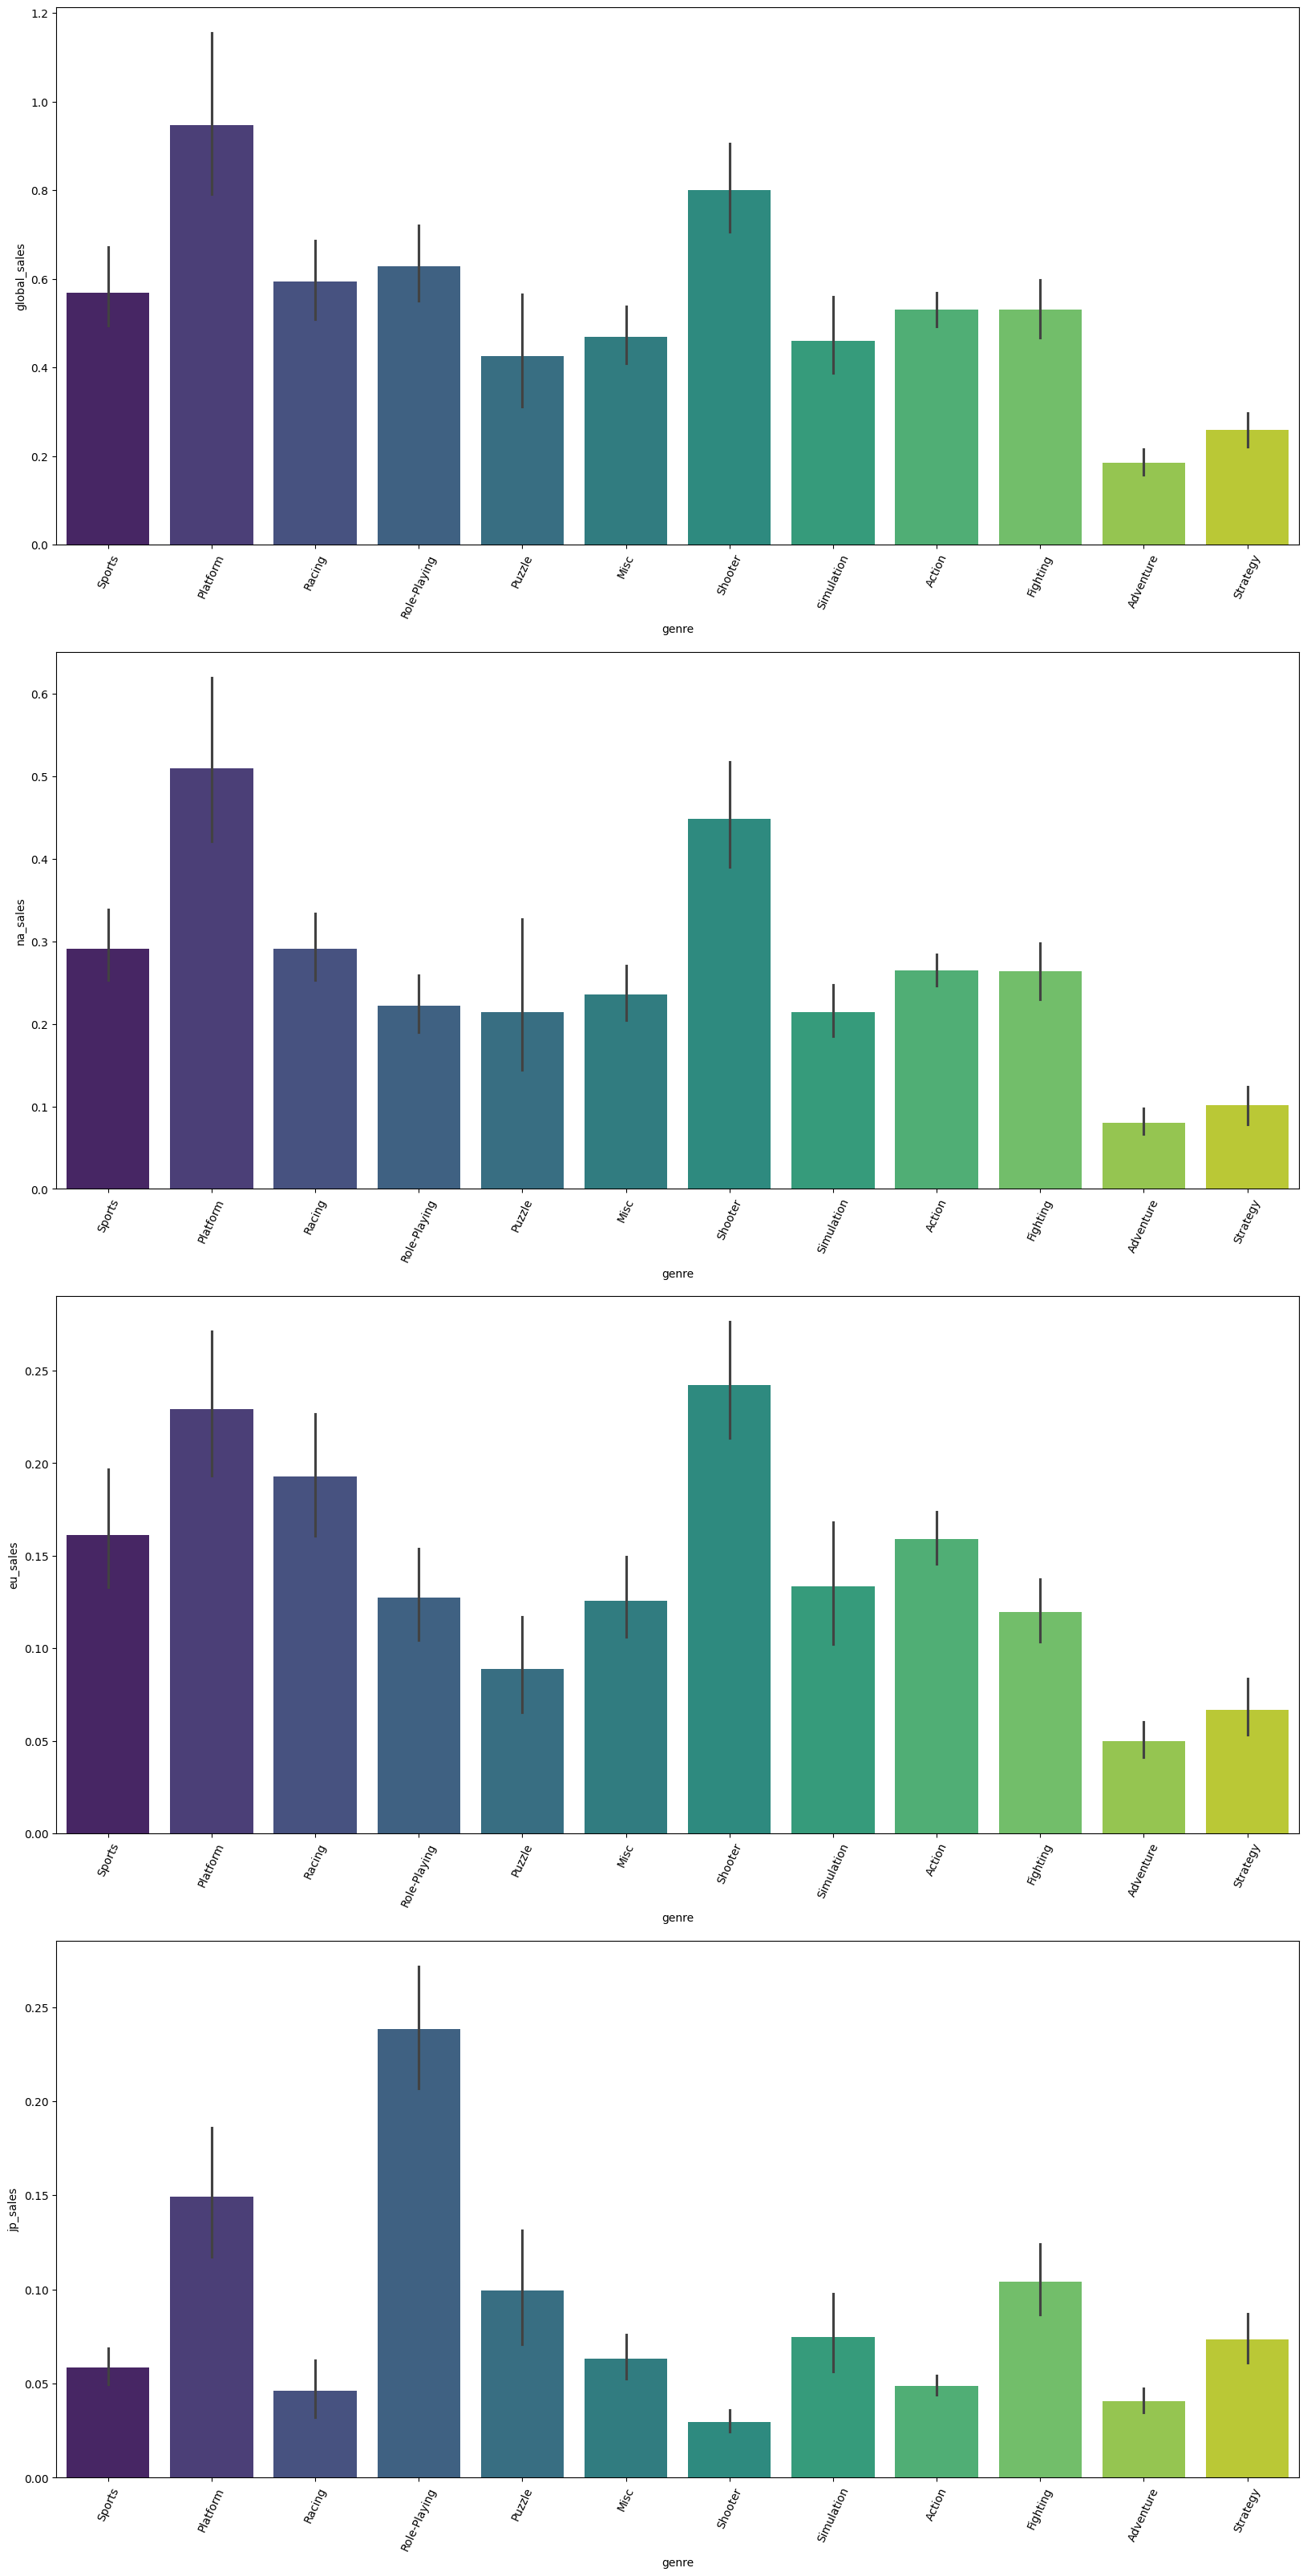

In [ ]:
plt.figure(figsize=(20,40))
plt.subplot(4,1,1)
sns.barplot(x = df_modified['genre'], y = df_modified['global_sales'],palette = 'viridis')
plt.xlabel('genre')
plt.ylabel('global_sales')
plt.xticks(rotation = 65)

plt.subplot(4,1,2)
sns.barplot(x = df_modified['genre'], y = df_modified['na_sales'],palette = 'viridis')
plt.xlabel('genre')
plt.ylabel('na_sales')
plt.xticks(rotation = 65)

plt.subplot(4,1,3)
sns.barplot(x = df_modified['genre'], y = df_modified['eu_sales'],palette = 'viridis')
plt.xlabel('genre')
plt.ylabel('eu_sales')
plt.xticks(rotation = 65)

plt.subplot(4,1,4)
sns.barplot(x = df_modified['genre'], y = df_modified['jp_sales'],palette = 'viridis')
plt.xlabel('genre')
plt.ylabel('jp_sales')
plt.xticks(rotation = 65)
plt.show()

По жанрам наблюдался тренд на платформеры, только в Японии на RP игры

In [131]:
#перевод из категориальных значений
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [132]:
categorial_colomns = []
for col in df_modified.columns:
  if df_modified[col].dtypes == 'object':
    categorial_colomns.append(col)

print(categorial_colomns)

['name', 'platform', 'genre', 'publisher']


In [133]:
for col in categorial_colomns:
  df_modified.loc[:, col] = label_encoder.fit_transform(df_modified[col])

<Axes: xlabel='global_sales', ylabel='publisher'>

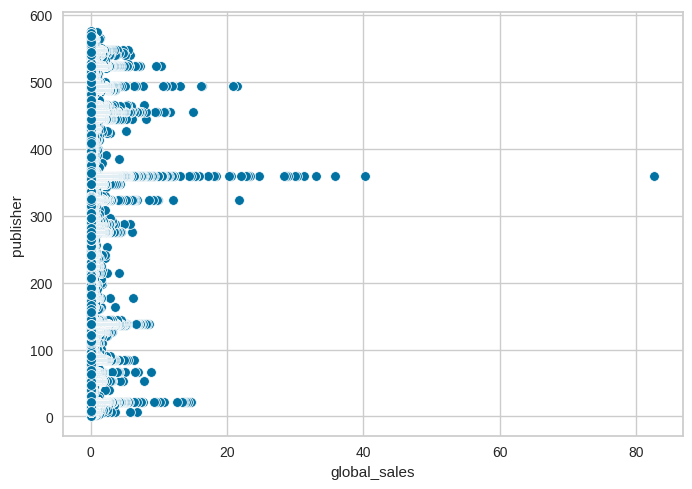

In [148]:
sns.scatterplot(data=df_modified, x="global_sales", y="publisher")

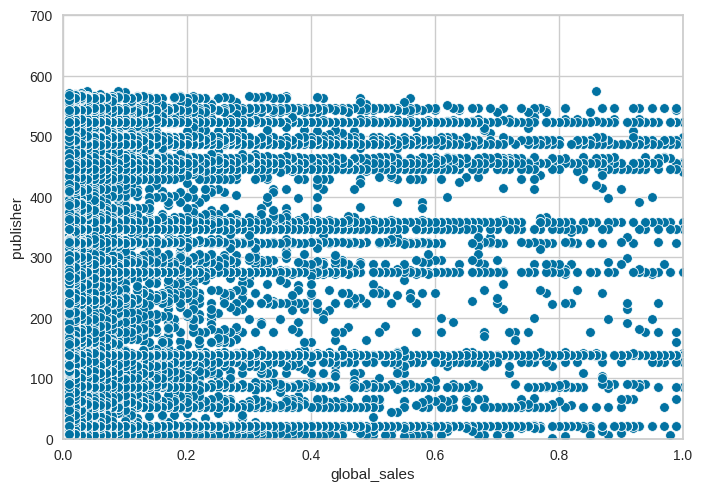

In [152]:
sns.scatterplot(data=df_modified, x="global_sales", y="publisher")
plt.xlim(0, 1)
plt.ylim(0, 700)
plt.show()

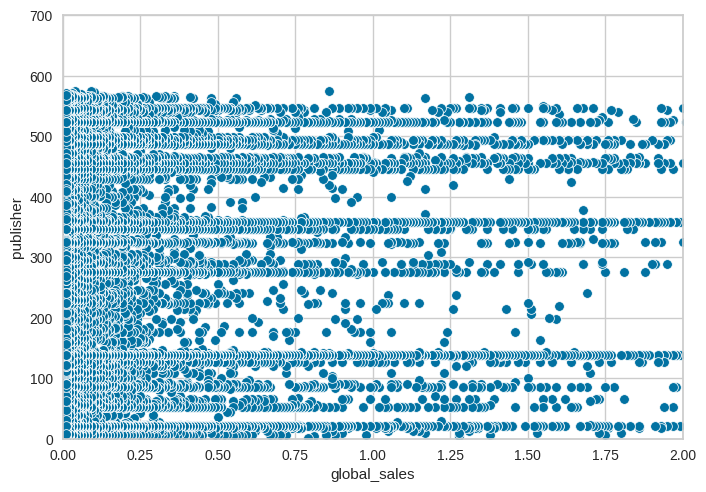

In [150]:
sns.scatterplot(data=df_modified, x="global_sales", y="publisher")
plt.xlim(0, 2)
plt.ylim(0, 700)
plt.show()

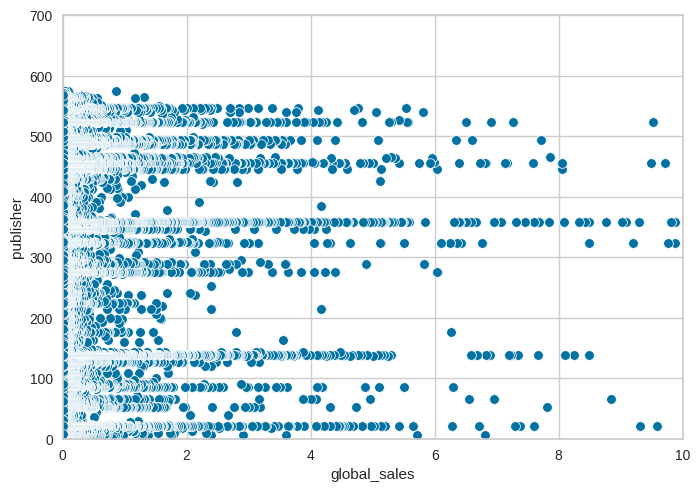

In [151]:
sns.scatterplot(data=df_modified, x="global_sales", y="publisher")
plt.xlim(0, 10)
plt.ylim(0, 700)
plt.show()

большая часть компаний имеет итоговый доход до 2 млн, у некоторых до 0,1

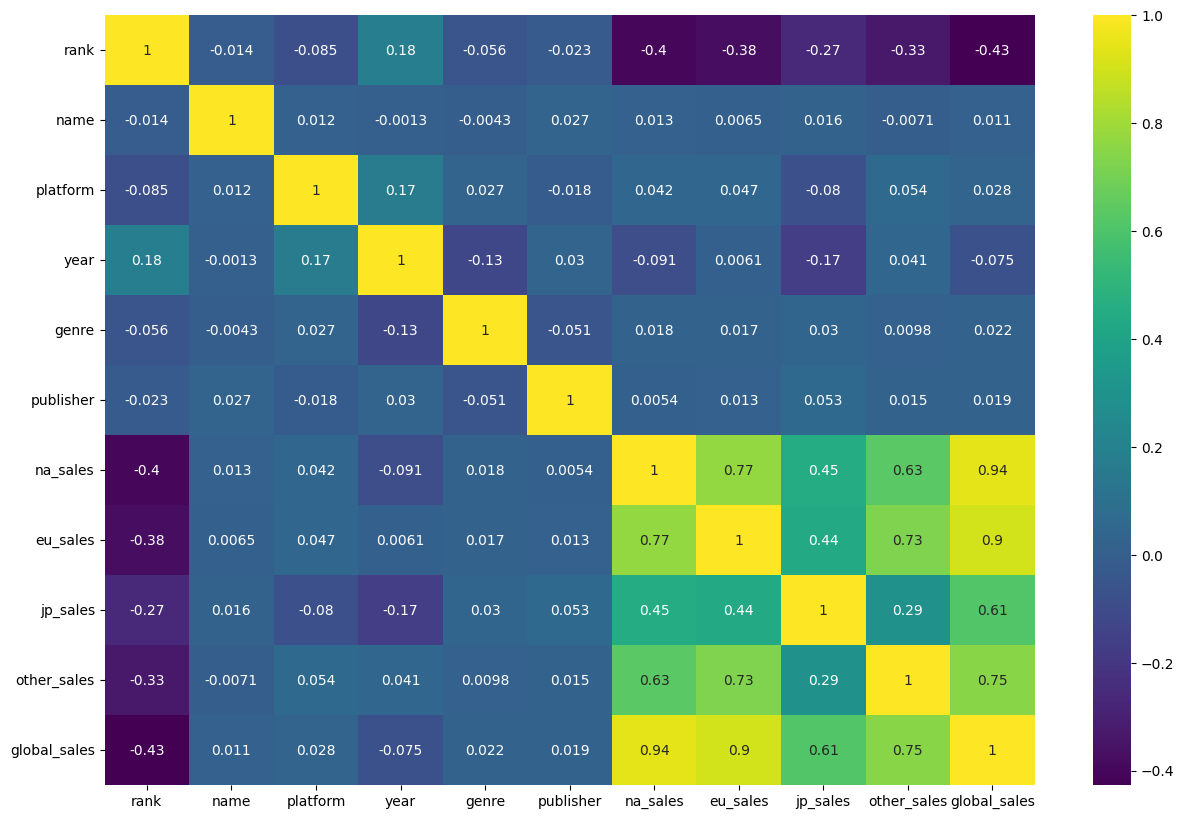

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df_modified.corr(), cmap='viridis', annot=True)

In [ ]:
df_modified = df_modified.drop(['name','eu_sales','na_sales'], axis = 1)

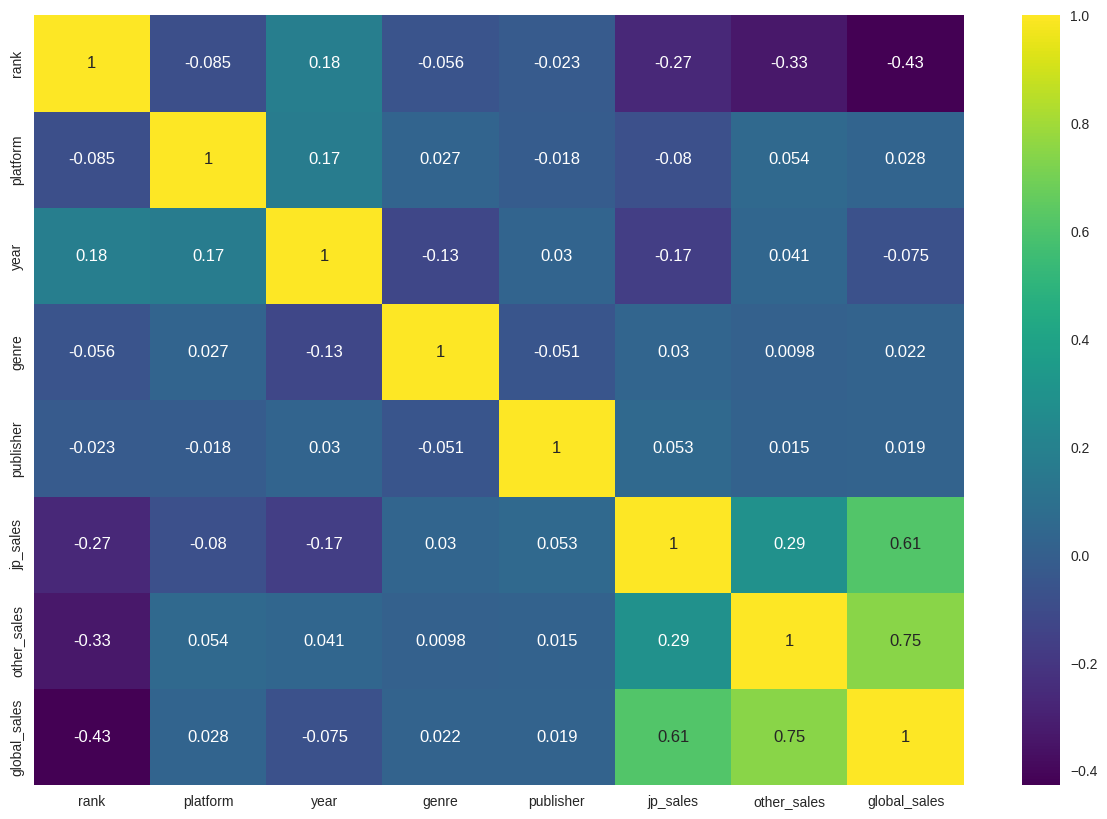

In [69]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df_modified.corr(), cmap='viridis', annot=True)

# **Линейная регрессия**

In [ ]:
!pip install tensorboard

In [38]:
from tensorflow.keras.callbacks import TensorBoard

In [39]:
tensorboard_callback = TensorBoard(log_dir='/content/logs')

In [40]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.svm import SVR


In [ ]:
X = df_modified.drop(['global_sales'],axis = 1)
y = df_modified['global_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.26218042720642026
MAE(test): 0.24890037166043755
MAE(ALL): 0.2588602095255666


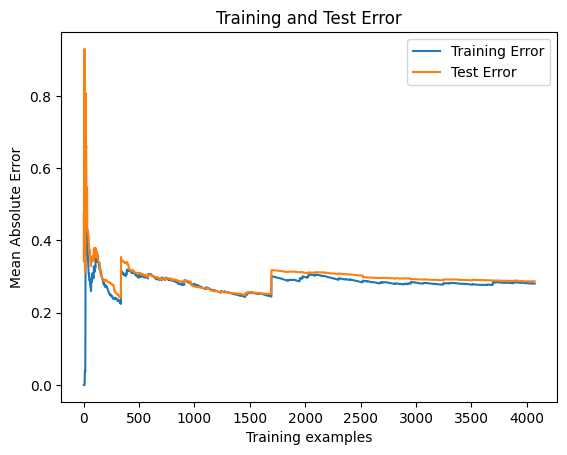

In [ ]:
train_errors = []
test_errors = []

for i in range(1, len(X_test)):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, len(X_test)), train_errors, label='Training Error')
plt.plot(range(1, len(X_test)), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

**тест показывает лучше результат, чем на тренировке, но ошибка не удовлетворяет нас(большая потеря прибыли)**

# **SVM регрессия**

In [ ]:
model = SVR(kernel = 'rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.17684451140191806
MAE(test): 0.17552366186202745
MAE(ALL): 0.17651427874732503


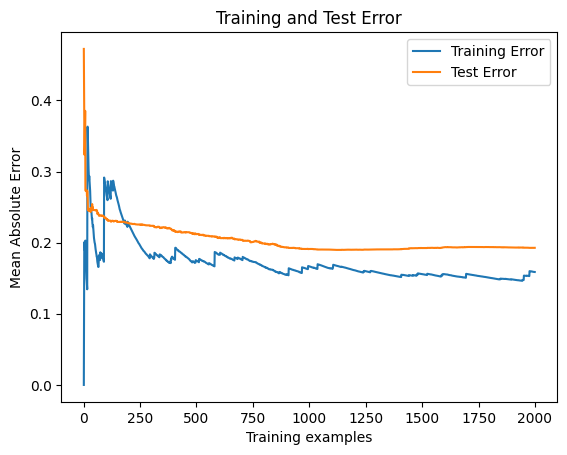

In [ ]:
train_errors = []
test_errors = []

for i in range(1, 2000):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, 2000), train_errors, label='Training Error')
plt.plot(range(1, 2000), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

In [ ]:
model = SVR(kernel = 'poly')
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.2621632346686776
MAE(test): 0.25974014756883723
MAE(ALL): 0.2615574257092736


In [ ]:
model = SVR(kernel = 'sigmoid')
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 285.34061176226237
MAE(test): 288.438017191743
MAE(ALL): 286.11501065209575


это мимо

будем подбирать C для rbf

In [ ]:
#C = 0.1
model = SVR(kernel = 'rbf', C = 0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.19056367286968232
MAE(test): 0.19002218067584345
MAE(ALL): 0.19042829151153948


In [ ]:
#C = 10
model = SVR(kernel = 'rbf', C = 10)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.16261038140202935
MAE(test): 0.15958867613245448
MAE(ALL): 0.1618549087138593


In [ ]:
#C = 250
model = SVR(kernel = 'rbf', C = 250)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.1486035347347869
MAE(test): 0.1452677963367525
MAE(ALL): 0.14776954894538205


In [ ]:
#C = 500
model = SVR(kernel = 'rbf', C = 500)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.14620277141469287
MAE(test): 0.14252556945254144
MAE(ALL): 0.14528341449419424


In [ ]:
#C = 1000
model = SVR(kernel = 'rbf', C = 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.14322502036496848
MAE(test): 0.13995412365810614
MAE(ALL): 0.1424072459934105


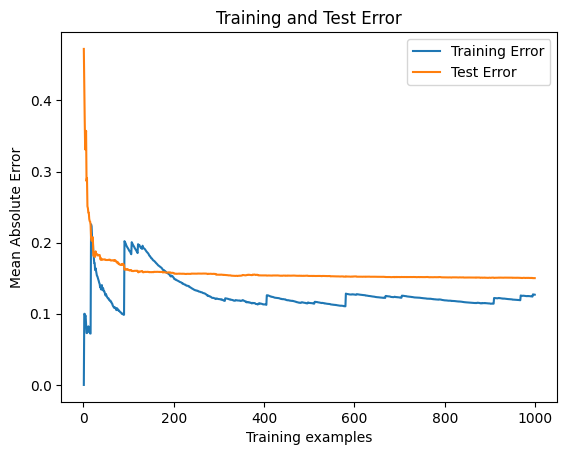

In [ ]:
train_errors = []
test_errors = []

for i in range(1, 1000):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, 1000), train_errors, label='Training Error')
plt.plot(range(1,1000), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

**Эта модель показывает себя лучше(почти на 50%), но для нас ошибка все равно считается большой**

# **Нейросеть**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float64)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float64)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float64)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float64)
X_tf = tf.convert_to_tensor(X, dtype=tf.float64)
y_tf = tf.convert_to_tensor(y, dtype=tf.float64)

In [ ]:
input_shape = (X_train.shape[1],)
model = tf.keras.Sequential([

        tf.keras.layers.Dense(units=15, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(units=12, activation='relu'),
        tf.keras.layers.Dense(units=1)
])

In [ ]:
model.compile(optimizer='adam',loss='mae')
loss=model.fit(X_train_tf, y_train_tf, epochs=100,callbacks=[tensorboard_callback])

Text(0.5, 1.0, 'loss history')

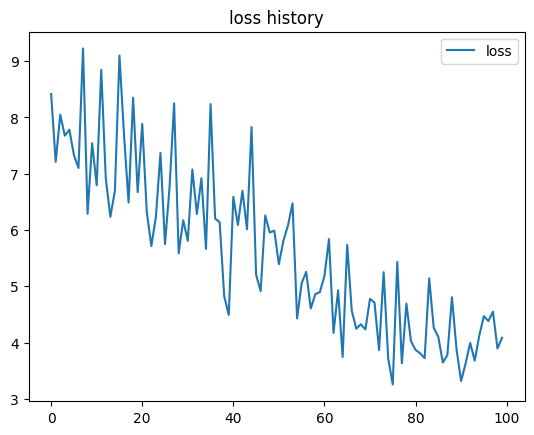

In [ ]:
loss_df = pd.DataFrame(loss.history)
loss_df.loc[:,['loss']].plot()
plt.title('loss history')

In [ ]:
y_pred = model.predict(X_test_tf)
print(mean_absolute_error(y_test_tf,y_pred))

128/128 [==============================] - 0s 1ms/step
7.242468733411879


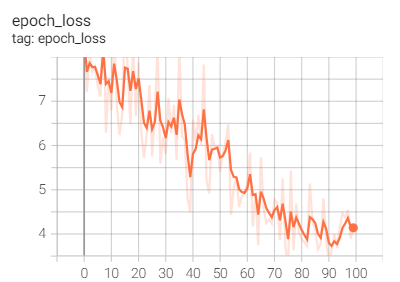

наблюдается большая ошибка, будем подбирать параметры

In [ ]:
input_shape = (X_train.shape[1],)
model = tf.keras.Sequential([

        tf.keras.layers.Dense(units=15, activation='tanh', input_shape=input_shape),
        tf.keras.layers.Dense(units=20, activation='tanh'),
        tf.keras.layers.Dense(units=18, activation='tanh'),
        tf.keras.layers.Dense(units=34, activation='tanh'),
        tf.keras.layers.Dense(units=1)
])

In [ ]:
model.compile(optimizer='adam',loss='mae')
loss=model.fit(X_train_tf, y_train_tf, epochs=100, callbacks=[tensorboard_callback])

128/128 [==============================] - 0s 1ms/step
MAE(test): 0.13613078633134443
510/510 [==============================] - 1s 1ms/step
MAE(all): 0.1378340335437719


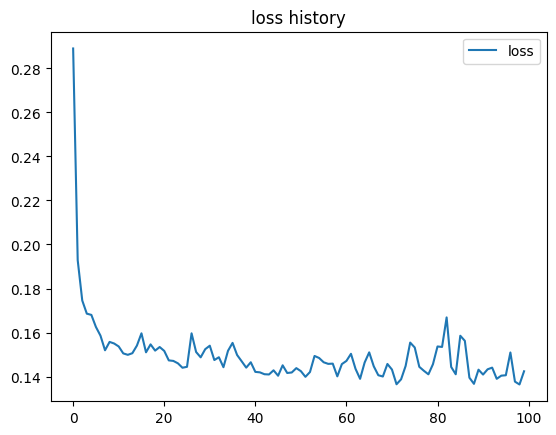

In [ ]:
loss_df = pd.DataFrame(loss.history)
loss_df.loc[:,['loss']].plot()
plt.title('loss history')
y_pred = model.predict( X_test_tf)
print('MAE(test):',mean_absolute_error(y_test_tf,y_pred))
y_pred = model.predict(X_tf)
print('MAE(all):', mean_absolute_error(y_tf,y_pred))

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=/content/logs

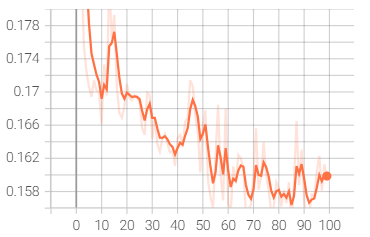

Нейросеть показывает чуть лучше результат, чем SVM

# **Деревья решений**

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree


In [ ]:
#1
model = DecisionTreeRegressor(criterion='squared_error',
                               max_depth=15,
                               min_samples_split=7,
                               min_samples_leaf=1,
                               random_state = 0)

model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_split=7, random_state=0)

In [ ]:
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.003399983630709071
MAE(test): 0.006479990179229341
MAE(ALL): 0.004170032533300873


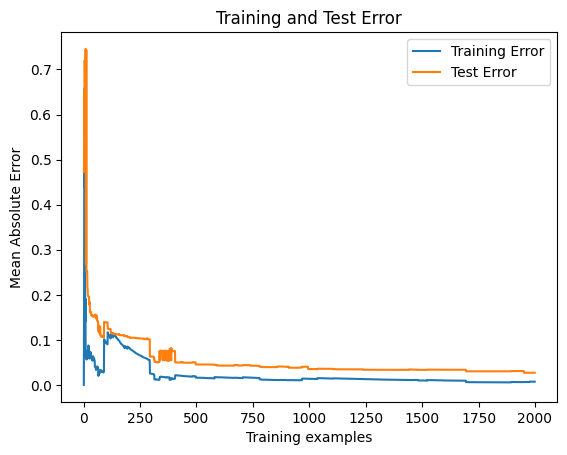

In [ ]:
train_errors = []
test_errors = []

for i in range(1, 2000):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, 2000), train_errors, label='Training Error')
plt.plot(range(1, 2000), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

In [ ]:
#2
model = DecisionTreeRegressor(criterion='squared_error',
                               max_depth=18,
                               min_samples_split=8,
                               min_samples_leaf=1,
                               random_state = 0)

model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=18, min_samples_split=8, random_state=0)

In [ ]:
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.00890351472067001
MAE(test): 0.00996626448271454
MAE(ALL): 0.009169218470029007


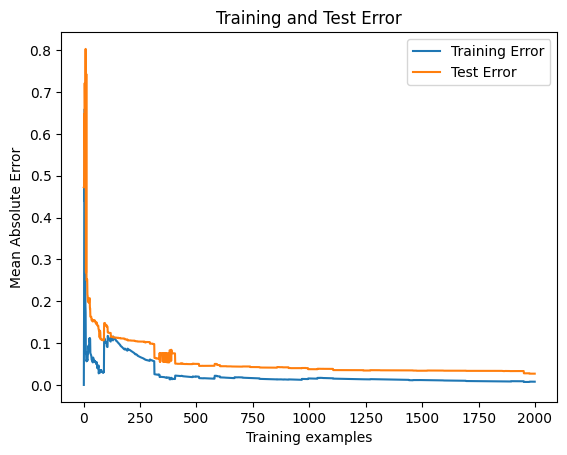

In [ ]:
train_errors = []
test_errors = []

for i in range(1, 2000):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, 2000), train_errors, label='Training Error')
plt.plot(range(1, 2000), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

Деревья решений показывают лучший результат(потери на всех данных роказывают 0.0042 млн долларов)

# **Случаный лес**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#1
model = RandomForestRegressor(n_estimators=10,
                              criterion='squared_error',
                              max_depth=18,
                              min_samples_split=8,
                              min_samples_leaf=1,
                              random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.005820114305627878
MAE(test): 0.005530005871475985
MAE(ALL): 0.0057475827451159


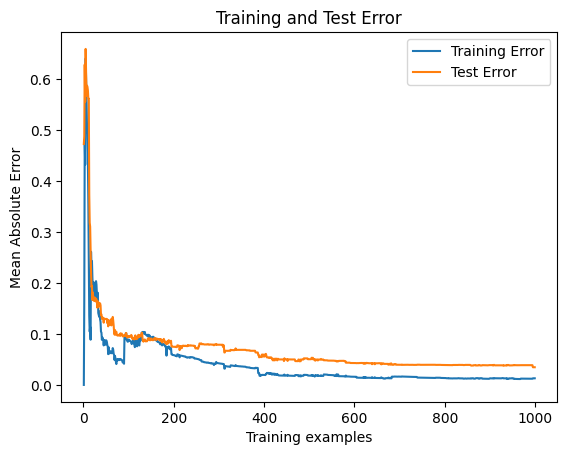

In [ ]:
train_errors = []
test_errors = []

for i in range(1, 1000):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, 1000), train_errors, label='Training Error')
plt.plot(range(1, 1000), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

In [ ]:
#2
model = RandomForestRegressor(n_estimators=50,
                              criterion='squared_error',
                              max_depth=15,
                              min_samples_split=7,
                              min_samples_leaf=1,
                              random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.004639526906997654
MAE(test): 0.004320373156115436
MAE(ALL): 0.0045597335715766695


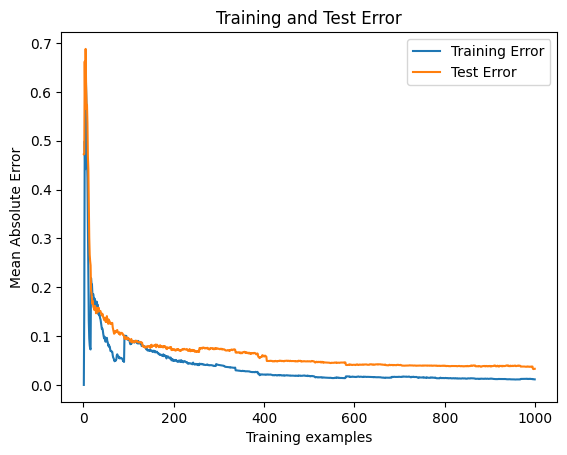

In [ ]:
train_errors = []
test_errors = []

for i in range(1, 1000):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, 1000), train_errors, label='Training Error')
plt.plot(range(1, 1000), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

In [ ]:
#3
model = RandomForestRegressor(n_estimators=35,
                              criterion='squared_error',
                              max_depth=19,
                              min_samples_split=8,
                              min_samples_leaf=1,
                              random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.005137013400891003
MAE(test): 0.004873194420080969
MAE(ALL): 0.00507105460714972


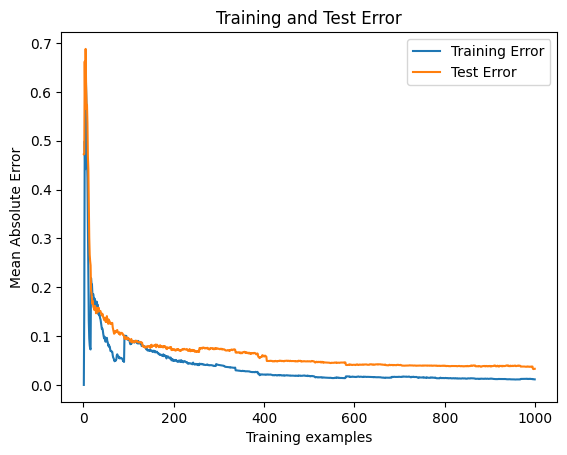

In [ ]:
train_errors = []
test_errors = []

for i in range(1, 1000):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, 1000), train_errors, label='Training Error')
plt.plot(range(1, 1000), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

Случайный лес показывает похожий резултат, как и дерево решений

# **Градиентные бустинги**

# **CatBoost**

In [ ]:
!pip install catboost

In [36]:
from catboost import CatBoostRegressor

In [ ]:
#1
model = CatBoostRegressor(depth=6, learning_rate=0.1,loss_function='MAE',eval_metric='MAE')
model.fit(X_train, y_train, eval_set=(X_test, y_test))

In [71]:
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.018784163236881375
MAE(test): 0.02818271599308817
MAE(ALL): 0.021133945655150987


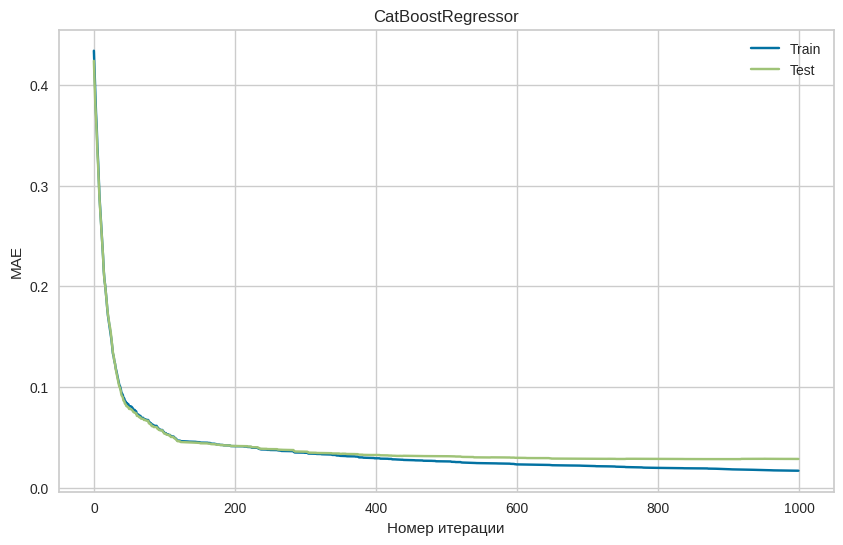

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(model.evals_result_['learn']['MAE'], label='Train')
plt.plot(model.evals_result_['validation']['MAE'], label='Test')
plt.xlabel('Номер итерации')
plt.ylabel('MAE')
plt.title('CatBoostRegressor')
plt.legend()
plt.show()

In [ ]:
#2
model = CatBoostRegressor(depth=14, learning_rate=0.01,loss_function='RMSE',eval_metric='MAE')
model.fit(X_train, y_train, eval_set=(X_test, y_test))

In [73]:
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.031393886785900764
MAE(test): 0.06088812329088499
MAE(ALL): 0.038767898527647796


In [ ]:
#3
model = CatBoostRegressor(depth=8, learning_rate=0.25, loss_function='MAE',eval_metric='MAE')
model.fit(X_train, y_train, eval_set=(X_test, y_test))

In [75]:
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.013722493042394026
MAE(test): 0.039674830160628824
MAE(ALL): 0.020210975583832266


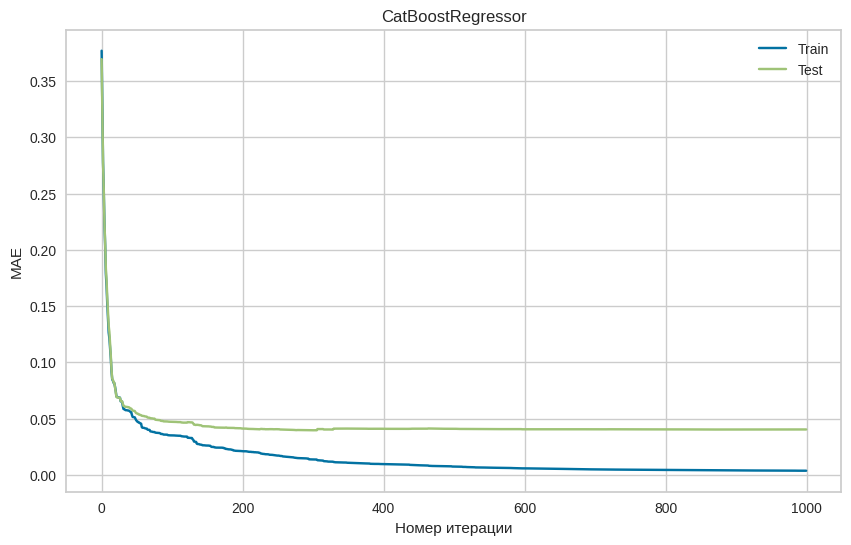

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(model.evals_result_['learn']['MAE'], label='Train')
plt.plot(model.evals_result_['validation']['MAE'], label='Test')
plt.xlabel('Номер итерации')
plt.ylabel('MAE')
plt.title('CatBoostRegressor')
plt.legend()
plt.show()

# **LightGBM**

In [64]:
from lightgbm import LGBMRegressor

In [82]:
X = df_modified.drop(['global_sales'],axis = 1)
y = df_modified['global_sales']

X['genre'] = X['genre'].isnull().astype(int)
X['platform'] = X['platform'].isnull().astype(int)
X['publisher'] = X['publisher'].isnull().astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [ ]:
#1
model = LGBMRegressor(n_estimators=50, max_depth=8, learning_rate=0.1, num_leaves=16)
model.fit(X_train, y_train)

In [94]:
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.032960041290784836
MAE(test): 0.028964506677872152
MAE(ALL): 0.031961096322496


In [ ]:
#2
model = LGBMRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, num_leaves=12)
model.fit(X_train, y_train)

In [87]:
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.031044301968430343
MAE(test): 0.028918527345538996
MAE(ALL): 0.030512825690790148


In [ ]:
#3
model = LGBMRegressor(n_estimators=75, max_depth=6, learning_rate=0.25, num_leaves=28)
model.fit(X_train, y_train)

In [92]:
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.030431878288870395
MAE(test): 0.02925605048523769
MAE(ALL): 0.03013790329383043


# **XGB**

In [95]:
from xgboost import XGBRegressor

In [97]:
X = df_modified.drop(['global_sales'],axis = 1)
y = df_modified['global_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [101]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [104]:
#1
model = XGBRegressor(n_estimators=50, max_depth=8, learning_rate=0.01)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [107]:
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.3643670166280309
MAE(test): 0.36748347440926127
MAE(ALL): 0.5024876341098404


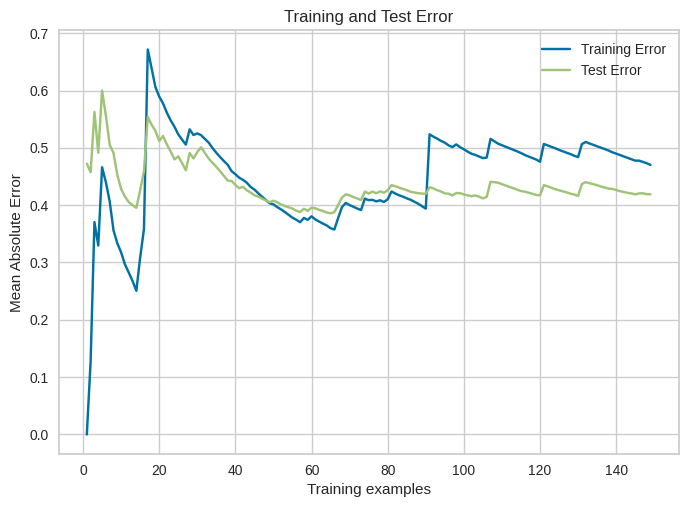

In [108]:
train_errors = []
test_errors = []

for i in range(1, 150):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, 150), train_errors, label='Training Error')
plt.plot(range(1, 150), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

In [ ]:
#2
model = XGBRegressor(n_estimators=100, max_depth=13, learning_rate=0.1)
model.fit(X_train, y_train)

In [110]:
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.0014916370110029838
MAE(test): 0.02314084098214984
MAE(ALL): 0.5172382437654782


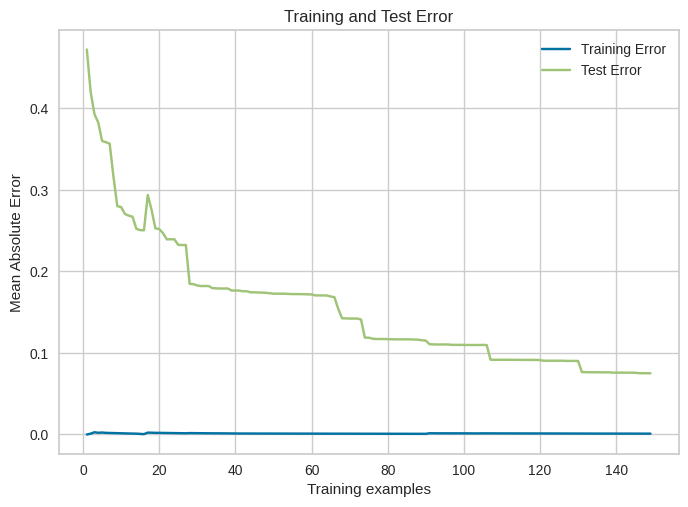

In [111]:
train_errors = []
test_errors = []

for i in range(1, 150):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, 150), train_errors, label='Training Error')
plt.plot(range(1, 150), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

Переобучилась

In [ ]:
#3
model = XGBRegressor(n_estimators=75, max_depth=6, learning_rate=0.01)
model.fit(X_train, y_train)

In [121]:
y_pred = model.predict(X_train)
print(f'MAE(train): {mean_absolute_error(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'MAE(test): {mean_absolute_error(y_test, y_pred)}')

y_pred = model.predict(X)
print(f'MAE(ALL): {mean_absolute_error(y, y_pred)}')

MAE(train): 0.28540577693117447
MAE(test): 0.28805145541719573
MAE(ALL): 0.4826678102236413


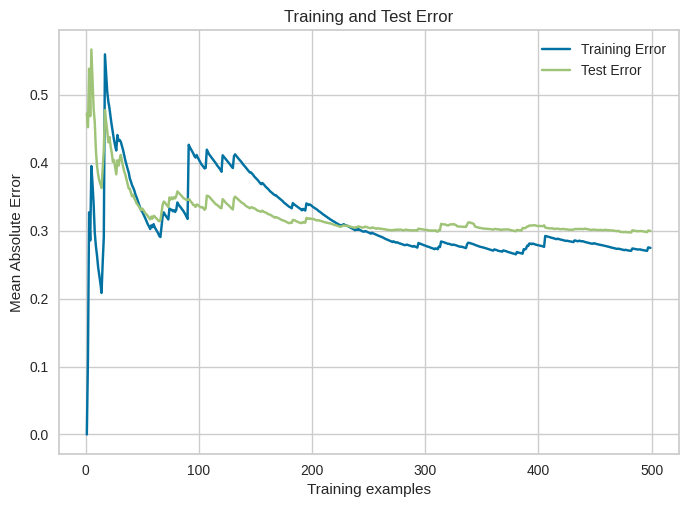

In [122]:
train_errors = []
test_errors = []

for i in range(1, 500):
    model.fit(X_train[:i], y_train[:i])
    train_pred = model.predict(X_train[:i])
    train_errors.append(mean_absolute_error(y_train[:i], train_pred))
    test_pred = model.predict(X_test)
    test_errors.append(mean_absolute_error(y_test, test_pred))

plt.plot(range(1, 500), train_errors, label='Training Error')
plt.plot(range(1, 500), test_errors, label='Test Error')
plt.xlabel('Training examples')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Test Error')
plt.legend()
plt.show()

# **Вывод**

**Все модели нехорошо себя показали(но не для всех компаний их можно использовать), но лучше всего себя показали деревья решений и случайный лес(ошибки около 0,0045 довольно хорошо для всех компаний, и для больших, и для маленьких)**

**Среди ГБ себя только плохо показал XGB(да и в целом хуже всех). Она может и подойти тока для очень крупных компаний, а для маленьких вообще нет(ошибка 0,5 очень большая)**

**И так, хорошим решением для всех комапаний будет использование таких моделей: деревья и случайный лес, ГБ(кроме XGB)**

**Линейную регрессию, SVM, NN можно использовать для тех, чей global_sales больше 0,2;но точнее будет их исползовать уже с 0,5(после 0,5 можно использовать XGB).**